In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import train_test_split

# Load the data

In [5]:
df = pd.read_csv(r'C:\Users\Victor Kithinzi\Downloads\Churn_Modelling.csv')

# Drop unnecessary columns

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# One-hot encode categorical variables

In [7]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Split the data into training and testing sets

In [8]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data

In [10]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

# Predict the labels of the test set

In [12]:
y_pred = rf.predict(X_test)

# Calculate the accuracy score

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.865


# Get the feature importances

In [14]:
importances = rf.feature_importances_

# Sort the features by importance

In [15]:
indices = np.argsort(importances)[::-1]

# Print the feature ranking

In [16]:
print('Feature ranking:')
for i in range(X.shape[1]):
    print('%d. %s (%f)' % (i + 1, X.columns[indices[i]], importances[indices[i]]))

Feature ranking:
1. Age (0.241642)
2. EstimatedSalary (0.145578)
3. CreditScore (0.142544)
4. Balance (0.139673)
5. NumOfProducts (0.130713)
6. Tenure (0.083717)
7. IsActiveMember (0.038542)
8. Geography_Germany (0.021320)
9. HasCrCard (0.018347)
10. Gender_Male (0.010378)
11. Geography_France (0.009724)
12. Gender_Female (0.009145)
13. Geography_Spain (0.008676)


In [17]:
from sklearn.tree import plot_tree

In [18]:
import matplotlib.pyplot as plt

# Plot the first tree

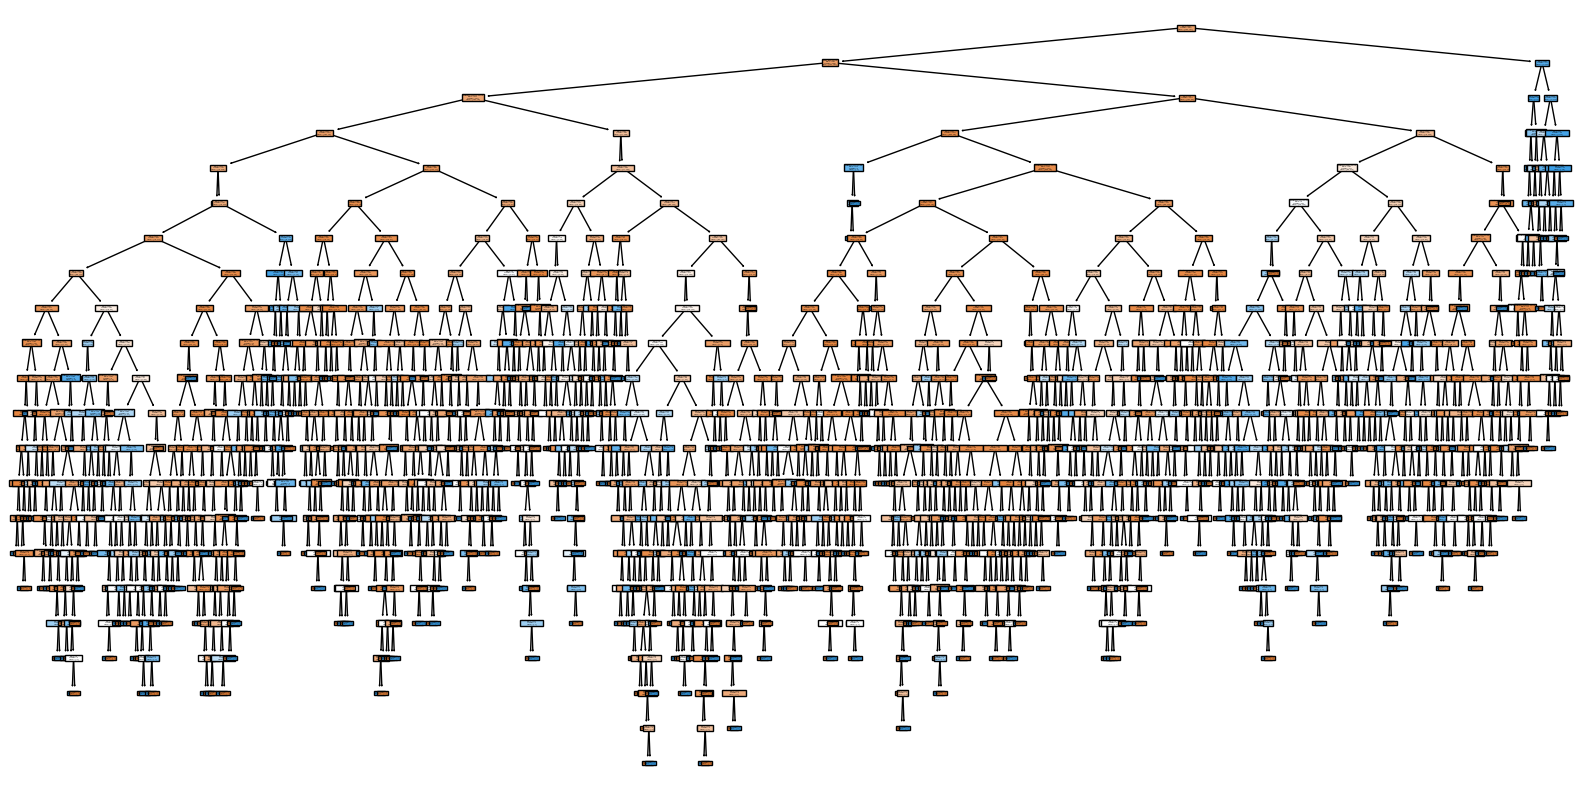

In [19]:
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)
plt.show()